<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


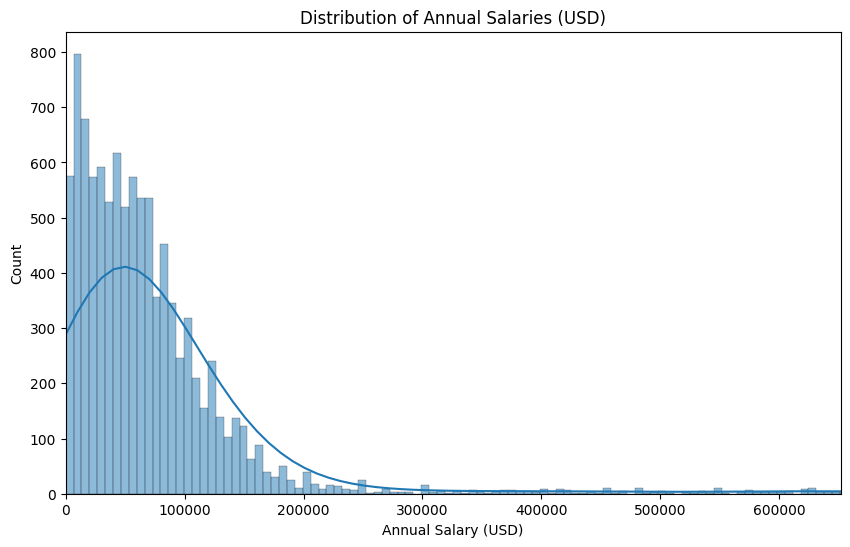


Summary Statistics:
count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64


In [13]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Plot both histogram and KDE
sns.histplot(data=df, x='ConvertedComp', kde=True)
plt.title('Distribution of Annual Salaries (USD)')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Count')

# Limit x-axis to make the plot more readable
plt.xlim(0, df['ConvertedComp'].quantile(0.95))
plt.show()

# Print basic statistics to understand the distribution better
print("\nSummary Statistics:")
print(df['ConvertedComp'].describe())

Plot the histogram for the column `ConvertedComp`.


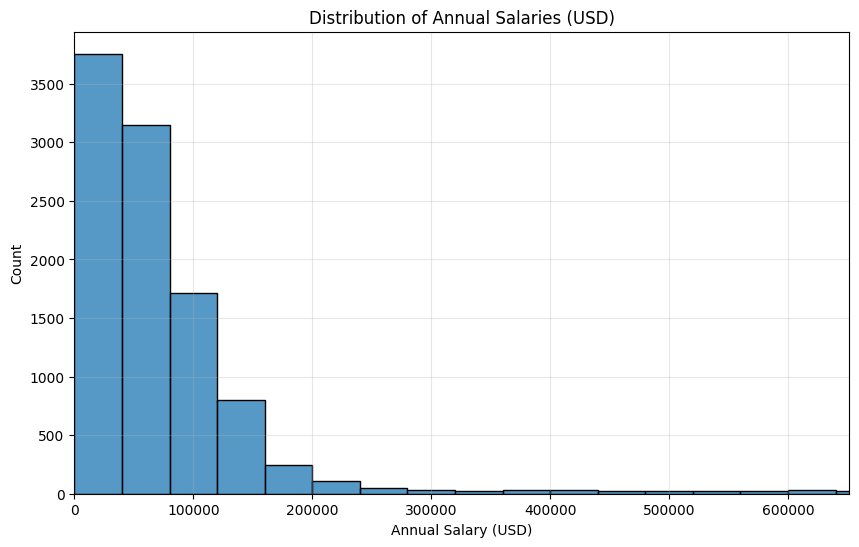

In [18]:
# your code goes here

# Create a larger figure for better visibility
"""
plt.figure(figsize=(10, 6))

# Create histogram
plt.hist(df['ConvertedComp'], bins=50, edgecolor='black')

# Add title and labels
plt.title('Distribution of Annual Salaries (USD)')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')

# Limit x-axis to 95th percentile to better show the distribution
plt.xlim(0, df['ConvertedComp'].quantile(0.95))

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(df['ConvertedComp'].describe()) #i know i will need this later

""""M3ExploratoryDataAnalysis-lab - Copy.ipynb"


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ConvertedComp', bins=50, edgecolor='black')
plt.title('Distribution of Annual Salaries (USD)')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Count')
plt.xlim(0, df['ConvertedComp'].quantile(0.95))
plt.grid(True, alpha=0.3)
plt.show()

What is the median of the column `ConvertedComp`?


In [19]:
# your code goes here
median_salary = df['ConvertedComp'].median()
print(f"The median salary is: ${median_salary:,.2f}")

The median salary is: $57,745.00


How many responders identified themselves only as a **Man**?


In [32]:
# your code goes here
# Filter for respondents 
men_only = df[df['Gender'] == 'Man']

# Count 
num_men_only = len(men_only)

print(f"Number of respondents identify only as 'Man': {num_men_only:,}")

Number of respondents identify only as 'Man': 10,480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [26]:
# your code goes here
# Filter 
women_only = df[df['Gender'] == 'Woman']

# Median
median_women_converted_comp = women_only['ConvertedComp'].median()

print(f"Median ConvertedComp for respondents identify only as 'Woman'$: {median_women_converted_comp:,.2f}")

Median ConvertedComp for respondents identify only as 'Woman'$: 57,708.00


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [38]:
# your code goes here

# Calculate the five-number summary for 'Age'
age_summary = df['Age'].describe()[['min', '25%', '50%', '75%', 'max']]

print("Five-number summary for 'Age':\n", age_summary)

Five-number summary for 'Age':
 min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


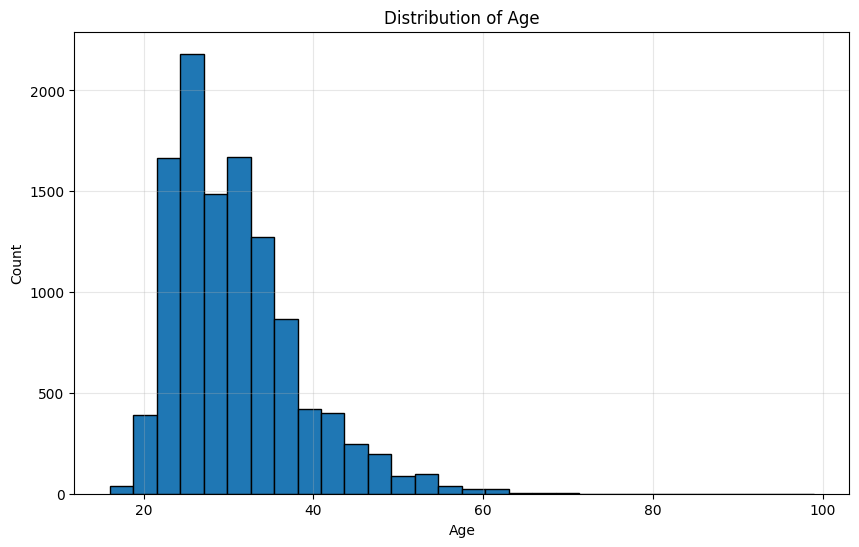

In [39]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


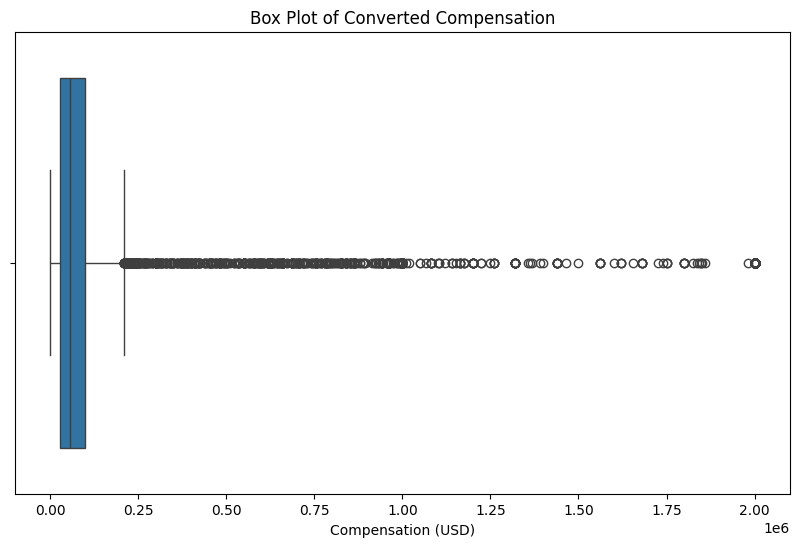

In [47]:
# your code goes here
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedComp'])
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here

# IQR for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for ConvertedComp:", IQR)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [15]:
# your code goes here

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [64]:
# your code goes here

# Calculate the IQR for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers in ConvertedComp:", num_outliers)

df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


# Calculate the median ConvertedComp after removing outliers
median_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].median()

# Calculate the mean ConvertedComp after removing outliers
mean_converted_comp_no_outliers = df_no_outliers['ConvertedComp'].mean()

# Results

print(f"Median ConvertedComp after removing outliers:{median_converted_comp_no_outliers:,}")
print(f"Mean ConvertedComp after removing outliers:{mean_converted_comp_no_outliers:,.4f}")


Number of outliers in ConvertedComp: 879
Median ConvertedComp after removing outliers:52,704.0
Mean ConvertedComp after removing outliers:59,883.2084


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [65]:
# your code goes here
# Calculate the IQR for 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Print the shape of the new DataFrame to confirm
print("Shape of DataFrame without outliers:", df_no_outliers.shape)

Shape of DataFrame without outliers: (9703, 85)


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [50]:
# your code goes here

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation between 'Age' and other numerical columns
age_correlations = numeric_df.corr()['Age']

# Print the result
print("Correlation between Age and other numerical columns:\n", age_correlations)

Correlation between Age and other numerical columns:
 Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


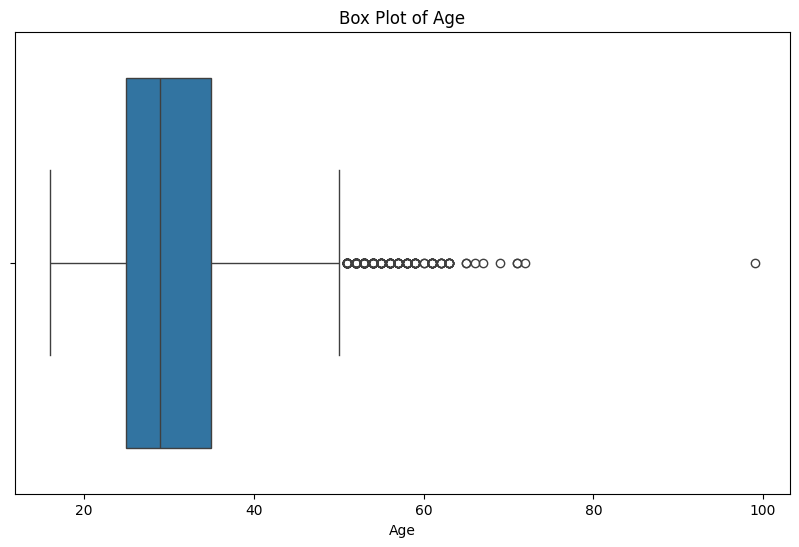

In [ ]:
# I added this code to make the plot bigger

# Create the box plot for 'Age'
sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title('Box Plot of Age')
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
